In [22]:
# !pip install deepface

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from deepface import DeepFace

In [2]:
# Function to visualize the reconstruction of the images - each row contains the original image, and the reconstructed image, also warped image if available
def visualize_reconstruction(original_images, reconstructed_images, warped_images=None, n = None):
    if n is None:
        n = len(reconstructed_images)
    for i in range(n):
        if warped_images is not None:
            fig, ax = plt.subplots(1, 3)
            ax[0].imshow(original_images[i])
            ax[1].imshow(warped_images[i])
            ax[2].imshow(reconstructed_images[i])
        else:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(original_images[i])
            ax[1].imshow(reconstructed_images[i])


def reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=False):
    distances = []
    threshold = 0
    for i in range(len(reconstructed_images)):
        res = DeepFace.verify(original_images[i], reconstructed_images[i], model_name=model, distance_metric=metric, enforce_detection=False)
        if i == 0:
            old = threshold
            threshold = res['threshold']
            if old != threshold:
                print('Threshold: ', threshold)

        distances.append(res['distance'])
    
    distances = np.array(distances)
    accuracy = np.mean(distances < threshold)
    print('Accuracy: ', accuracy)

    if generate_plot:
        import seaborn as sns
        sns.kdeplot(distances)
        plt.axvline(x=threshold, color='r', linestyle='--')
        plt.xlabel('{} Distance'.format(metric))
        plt.ylabel('Density')
        


### Evaluation in case of normal reconstruction

In [24]:
path = "ffhq_warped_results/40_20_0/test/samples_500x64x64x3.npz"
model_output = np.load(path)
print(model_output.files)
original_images = model_output['arr_2']
reconstructed_images = model_output['arr_0']

['arr_0', 'arr_1', 'arr_2']


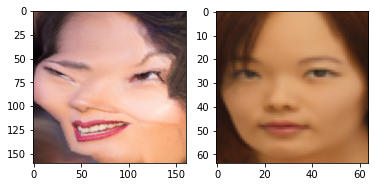

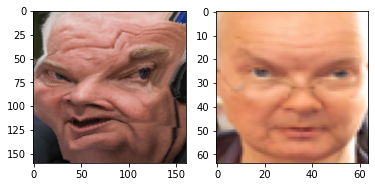

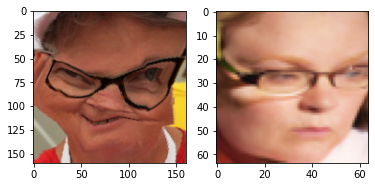

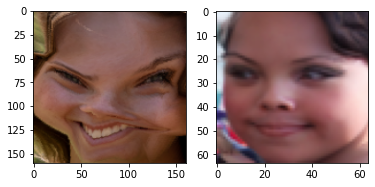

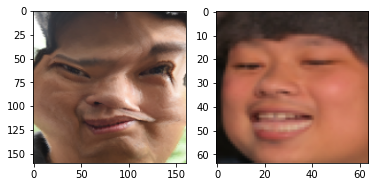

In [25]:
visualize_reconstruction(original_images, reconstructed_images, n=5)

Threshold:  0.68
Accuracy:  0.696


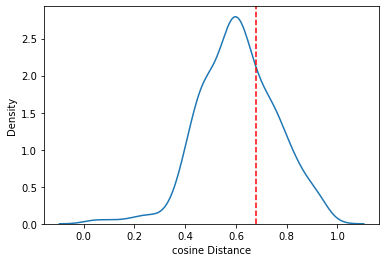

In [26]:
reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=True)

### Evaluation in case of Warping Method

In [ ]:
param1 = "20_9_0"
param2 = "train"
model_output = np.load('ffhq_warped_results/{}/{}/samples_500x64x64x3.npz'.format(param1, param2))

warped_images = model_output['arr_2']
reconstructed_images = model_output['arr_0']

warped_image_data = "ffhq_warped/{}/{}/images/".format(param1, param2)
original_image_data = "datasets/ffhq256/{}/images/".format(param2)
warped_image_files = os.listdir(warped_image_data)
warped_image_files.sort()

original_images = []
for file in warped_image_files:
    original_image = cv2.imread(os.path.join(original_image_data, file))
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_images.append(original_image)
    

FileNotFoundError: [Errno 2] No such file or directory: 'ffhq256/warped_data/20_9_0_train.npz'

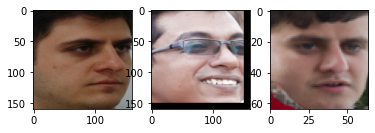

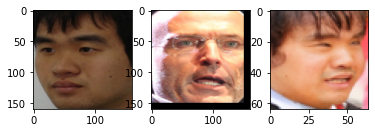

In [ ]:
# Visualize the reconstruction
visualize_reconstruction(original_images, reconstructed_images, warped_images, n=2)

Accuracy:  0.5897435897435898


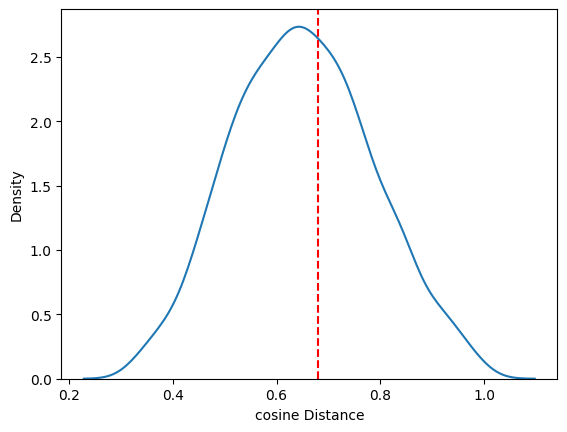

In [ ]:
# Calculate the accuracy of the reconstruction
reconstruction_accuracy(original_images, reconstructed_images, metric='cosine', model='ArcFace', generate_plot=True)